<a href="https://colab.research.google.com/github/HowardHNguyen/PhD/blob/main/Heart_Failure_Prediction_on_319795_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data description: dataset consists of 319795 observations
The dataset originally comes from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to collect data on the health status of U.S. residents. As described by the CDC: "Established in 1984 with 15 states, BRFSS now collects data in all 50 states, the District of Columbia, and three U.S. territories. BRFSS completes more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system in the world. The most recent dataset includes data from 2023.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/data/heart_disease_319795.csv', sep=',')
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


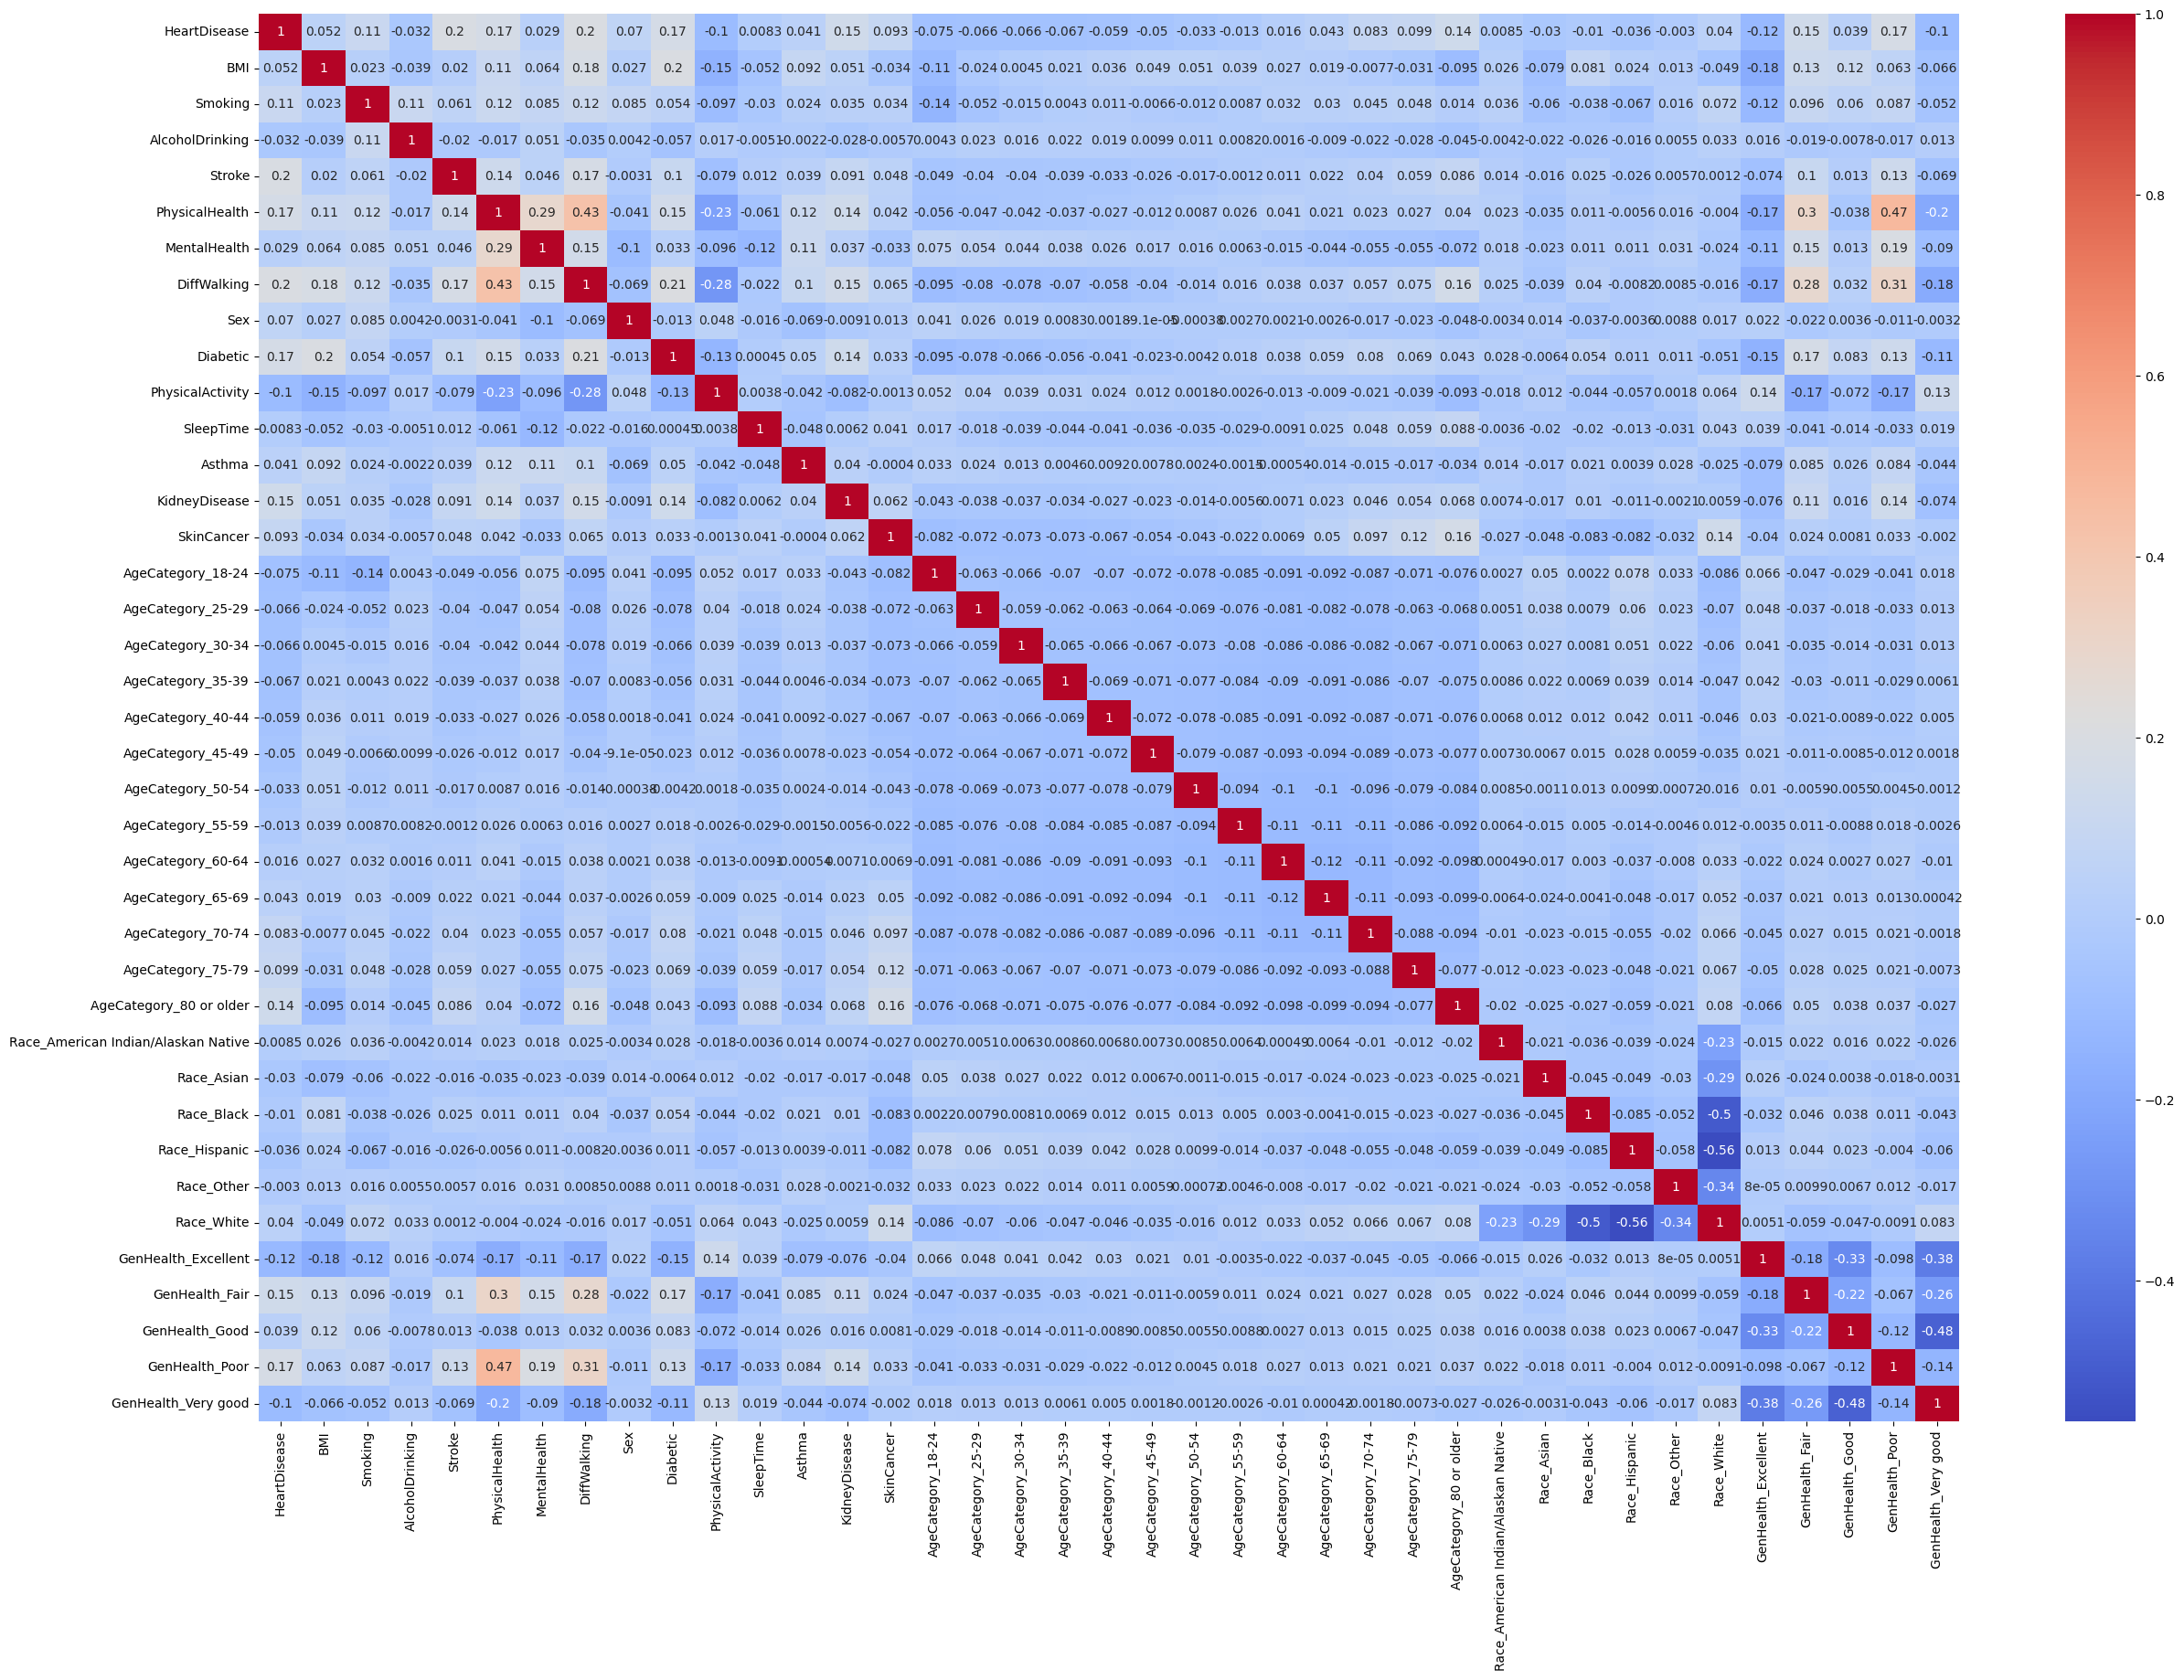

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Sample data
df = pd.DataFrame(data)

# Encode categorical variables
label_encoder = LabelEncoder()

# Apply label encoding to ordinal categorical columns
df['HeartDisease'] = label_encoder.fit_transform(df['HeartDisease'])
df['Smoking'] = label_encoder.fit_transform(df['Smoking'])
df['AlcoholDrinking'] = label_encoder.fit_transform(df['AlcoholDrinking'])
df['Stroke'] = label_encoder.fit_transform(df['Stroke'])
df['DiffWalking'] = label_encoder.fit_transform(df['DiffWalking'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Diabetic'] = label_encoder.fit_transform(df['Diabetic'])
df['PhysicalActivity'] = label_encoder.fit_transform(df['PhysicalActivity'])
df['Asthma'] = label_encoder.fit_transform(df['Asthma'])
df['KidneyDisease'] = label_encoder.fit_transform(df['KidneyDisease'])
df['SkinCancer'] = label_encoder.fit_transform(df['SkinCancer'])

# One-hot encode nominal categorical columns
df = pd.get_dummies(df, columns=['AgeCategory', 'Race', 'GenHealth'])

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.show()

In [ ]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
data.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


In [ ]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


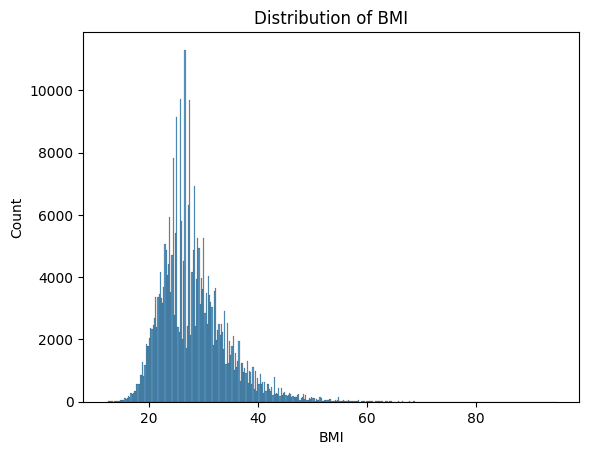

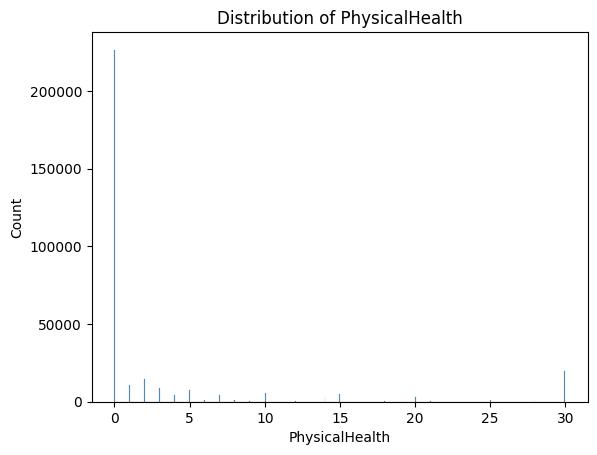

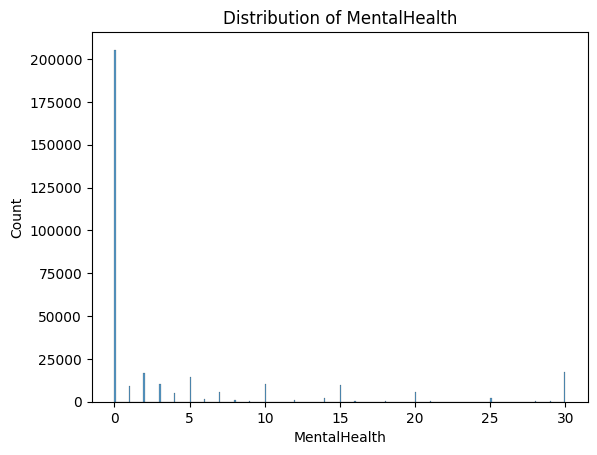

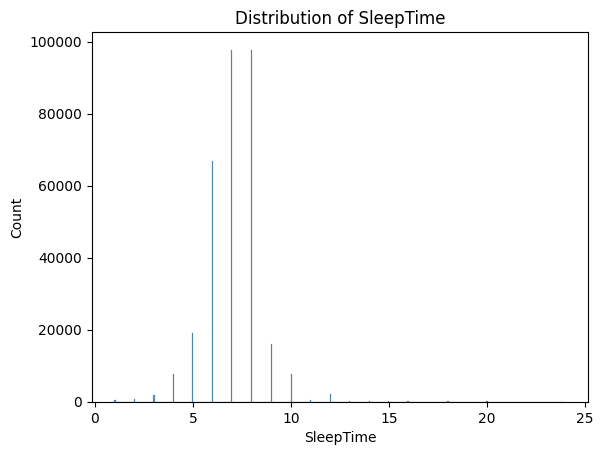

In [ ]:
# prompt: histplot for this dataset

import matplotlib.pyplot as plt
# Histplot for each numerical feature
for column in data.select_dtypes(include=['number']):
  plt.figure()
  sns.histplot(data[column])
  plt.title(f'Distribution of {column}')
  plt.show()


In [ ]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

### Based ML models

**SMOTE (Synthetic Minority Over-sampling Technique) and most machine learning models require numeric input. Therefore, you need to encode these categorical variables before applying SMOTE and training your models.**

1. Encoding Categorical Variables: Convert categorical variables into numeric values using LabelEncoder and pd.get_dummies.
2. Define Features and Target: Drop the target column HeartDisease from the features and assign it to y.
3. Apply SMOTE: Balance the dataset using SMOTE.
4. Split Data: Split the resampled data into training and testing sets.
5. Scale Features: Standardize the features using StandardScaler.
6. Train and Evaluate Models: Train each model and evaluate its performance using classification metrics and ROC AUC.

In [ ]:
!pip install imblearn

In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 3.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
df = pd.DataFrame(data)

# Encode categorical variables
label_encoder = LabelEncoder()

# Apply label encoding to ordinal categorical columns
df['HeartDisease'] = label_encoder.fit_transform(df['HeartDisease'])
df['Smoking'] = label_encoder.fit_transform(df['Smoking'])
df['AlcoholDrinking'] = label_encoder.fit_transform(df['AlcoholDrinking'])
df['Stroke'] = label_encoder.fit_transform(df['Stroke'])
df['DiffWalking'] = label_encoder.fit_transform(df['DiffWalking'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Diabetic'] = label_encoder.fit_transform(df['Diabetic'])
df['PhysicalActivity'] = label_encoder.fit_transform(df['PhysicalActivity'])
df['Asthma'] = label_encoder.fit_transform(df['Asthma'])
df['KidneyDisease'] = label_encoder.fit_transform(df['KidneyDisease'])
df['SkinCancer'] = label_encoder.fit_transform(df['SkinCancer'])

# One-hot encode nominal categorical columns
df = pd.get_dummies(df, columns=['AgeCategory', 'Race', 'GenHealth'])

# Define features and target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
# log_reg = LogisticRegression(max_iter=10000)
log_reg = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]

# Evaluation
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
print(f'ROC AUC: {roc_auc_lr:.2f}')

Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.86      0.85     58485
           1       0.86      0.84      0.85     58484

    accuracy                           0.85    116969
   macro avg       0.85      0.85      0.85    116969
weighted avg       0.85      0.85      0.85    116969

ROC AUC: 0.94
-------------------------------------------------------


In [ ]:
# Support Vector Machine
# svm = SVC(probability=True)
svm = SVC(C=1.0, kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)
y_proba_svm = svm.predict_proba(X_test)[:, 1]

# Evaluation
print("Support Vector Machine")
print(classification_report(y_test, y_pred_svm))
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)
print(f'ROC AUC: {roc_auc_svm:.2f}')

In [ ]:
# Random Forest
# rf = RandomForestClassifier(random_state=42)
rf = RandomForestClassifier(max_depth=3, n_estimators=30, min_samples_leaf=5, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Random Forest")
print(classification_report(y_test, y_pred_rf))
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f'ROC AUC: {roc_auc_rf:.2f}')

Random Forest
              precision    recall  f1-score   support

           0       0.72      0.81      0.76     58485
           1       0.78      0.69      0.73     58484

    accuracy                           0.75    116969
   macro avg       0.75      0.75      0.75    116969
weighted avg       0.75      0.75      0.75    116969

ROC AUC: 0.84
-------------------------------------------------------


In [ ]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Random Forest")
print(classification_report(y_test, y_pred_rf))
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f'ROC AUC: {roc_auc_rf:.2f}')

Random Forest
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     58485
           1       0.93      0.92      0.92     58484

    accuracy                           0.93    116969
   macro avg       0.93      0.93      0.93    116969
weighted avg       0.93      0.93      0.93    116969

ROC AUC: 0.98


In [ ]:
# Gradient Boosting Machine
gbm = GradientBoostingClassifier(random_state=42)
# gbm = GradientBoostingClassifier(max_depth=3, n_estimators=30, min_samples_leaf=5, random_state=42)
gbm.fit(X_train, y_train)

# Predictions
y_pred_gbm = gbm.predict(X_test)
y_proba_gbm = gbm.predict_proba(X_test)[:, 1]

# Evaluation
print("Gradient Boosting Machine")
print(classification_report(y_test, y_pred_gbm))
roc_auc_gbm = roc_auc_score(y_test, y_proba_gbm)
print(f'ROC AUC: {roc_auc_gbm:.2f}')

Gradient Boosting Machine
              precision    recall  f1-score   support

           0       0.85      0.82      0.84     58485
           1       0.83      0.85      0.84     58484

    accuracy                           0.84    116969
   macro avg       0.84      0.84      0.84    116969
weighted avg       0.84      0.84      0.84    116969

ROC AUC: 0.92
-------------------------------------------------------


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# XGBoost Classifier
xgbm = XGBClassifier(random_state=42)
# xgbm = XGBClassifier(max_depth=3, min_child_weight=10, subsample=0.7, colsample_bytree=0.7, random_state=42)
xgbm.fit(X_train, y_train)

# Predictions
y_pred_xgbm = xgbm.predict(X_test)
y_proba_xgbm = xgbm.predict_proba(X_test)[:, 1]

# Evaluation
print("XGBoost")
print(classification_report(y_test, y_pred_xgbm))
roc_auc_xgbm = roc_auc_score(y_test, y_proba_xgbm)
print(f'ROC AUC: {roc_auc_xgbm:.2f}')

XGBoost
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     58485
           1       0.91      0.87      0.89     58484

    accuracy                           0.89    116969
   macro avg       0.89      0.89      0.89    116969
weighted avg       0.89      0.89      0.89    116969

ROC AUC: 0.96


### RF + GBM + xGBM

Stacking Ensemble of RF + GBM + xGBM on 319795 dataset
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     58485
           1       0.94      0.92      0.93     58484

    accuracy                           0.93    116969
   macro avg       0.93      0.93      0.93    116969
weighted avg       0.93      0.93      0.93    116969

ROC AUC - 319795 dataset: 0.98


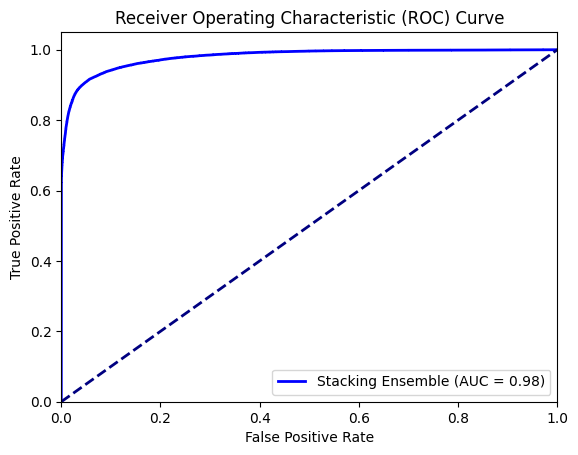

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Define the base models
base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gbm', GradientBoostingClassifier(random_state=42)),
    ('xgbm', XGBClassifier(random_state=42))
]

# Define the meta-learner model
meta_model = LogisticRegression()

# Create the stacking ensemble
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacking ensemble
stacking_clf.fit(X_train, y_train)

# Evaluate the stacking ensemble
y_pred_stack = stacking_clf.predict(X_test)
y_proba_stack = stacking_clf.predict_proba(X_test)[:, 1]

# Print evaluation metrics
print("Stacking Ensemble of RF + GBM + xGBM on 319795 dataset")
print(classification_report(y_test, y_pred_stack))
roc_auc_stack = roc_auc_score(y_test, y_proba_stack)
print(f'ROC AUC - 319795 dataset: {roc_auc_stack:.2f}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_stack)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Stacking Ensemble (AUC = {roc_auc_stack:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### RF + xGBM + SVM

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Define the base models
base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgbm', XGBClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
]

# Define the meta-learner model
meta_model = LogisticRegression()

# Create the stacking ensemble
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacking ensemble
stacking_clf.fit(X_train, y_train)

# Evaluate the stacking ensemble
y_pred_stack = stacking_clf.predict(X_test)
y_proba_stack = stacking_clf.predict_proba(X_test)[:, 1]

# Print evaluation metrics
print("Stacking Ensemble RF + XGBM + SVM on dataset 319795")
print(classification_report(y_test, y_pred_stack))
roc_auc_stack = roc_auc_score(y_test, y_proba_stack)
print(f'ROC AUC on dataset 319795: {roc_auc_stack:.2f}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_stack)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Stacking Ensemble (AUC = {roc_auc_stack:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Feature Importance from RF

Random Forest Feature Importances - 319795 dataset
                                Feature  Importance
0                                   BMI    0.199320
10                            SleepTime    0.081164
26              AgeCategory_80 or older    0.058406
34                       GenHealth_Fair    0.054581
4                        PhysicalHealth    0.046794
24                    AgeCategory_70-74    0.039099
25                    AgeCategory_75-79    0.039031
5                          MentalHealth    0.038348
35                       GenHealth_Good    0.037132
36                       GenHealth_Poor    0.037092
32                           Race_White    0.034222
23                    AgeCategory_65-69    0.029486
8                              Diabetic    0.028503
9                      PhysicalActivity    0.025334
22                    AgeCategory_60-64    0.023314
37                  GenHealth_Very good    0.020903
33                  GenHealth_Excellent    0.019968
7            

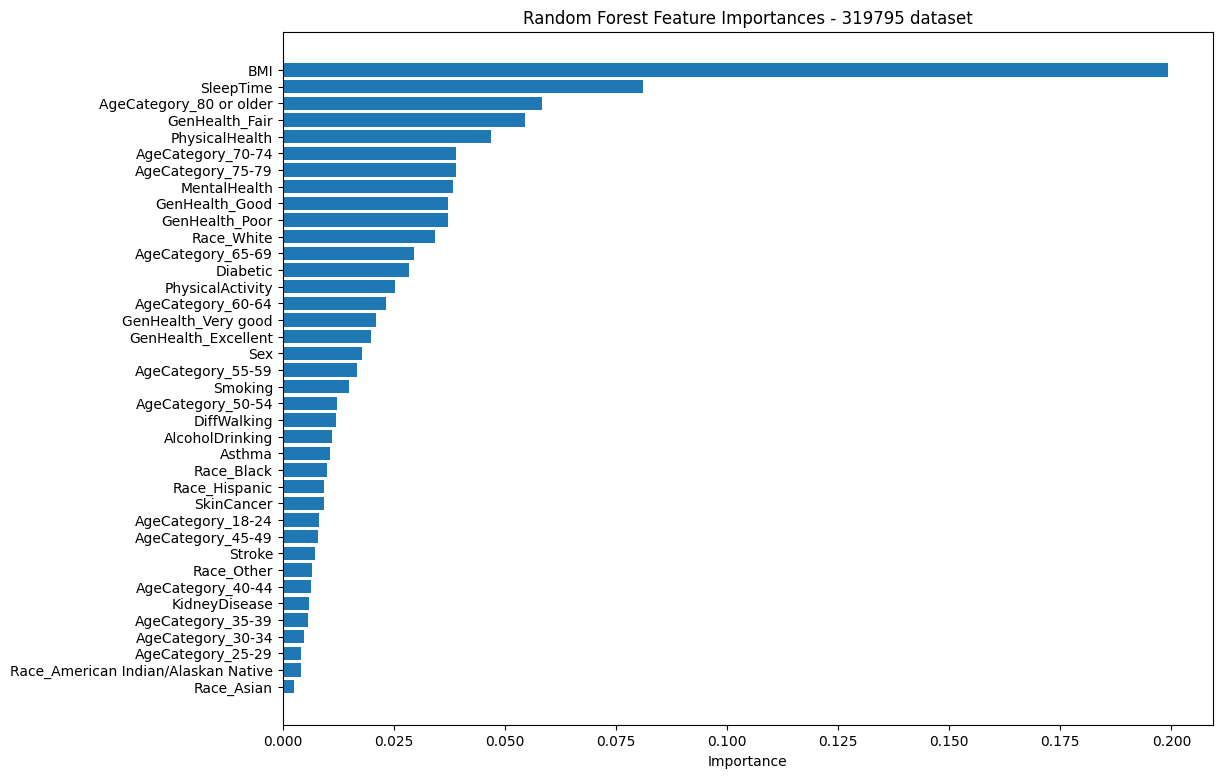

Gradient Boosting Machine Feature Importances - 319795 dataset
                                Feature  Importance
26              AgeCategory_80 or older    0.138169
34                       GenHealth_Fair    0.113898
25                    AgeCategory_75-79    0.094282
24                    AgeCategory_70-74    0.091176
36                       GenHealth_Poor    0.090110
35                       GenHealth_Good    0.075042
32                           Race_White    0.061867
23                    AgeCategory_65-69    0.060480
22                    AgeCategory_60-64    0.038537
10                            SleepTime    0.037869
9                      PhysicalActivity    0.027007
8                              Diabetic    0.026264
21                    AgeCategory_55-59    0.022257
2                       AlcoholDrinking    0.016727
37                  GenHealth_Very good    0.015591
20                    AgeCategory_50-54    0.013887
7                                   Sex    0.010896
3

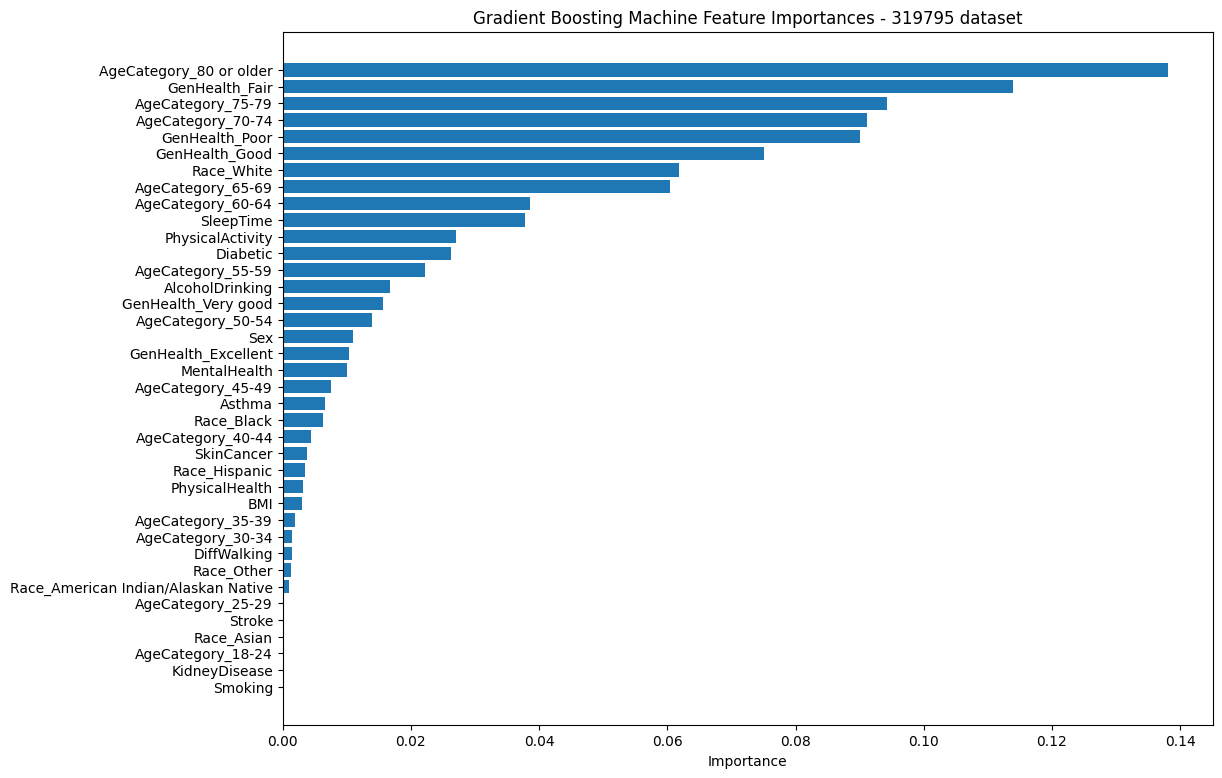

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the Random Forest model
feature_importances_rf = rf.feature_importances_

# Create a DataFrame for feature importances
features = X.columns
importance_df_rf = pd.DataFrame({'Feature': features, 'Importance': feature_importances_rf})

# Sort the DataFrame by importance
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Random Forest Feature Importances - 319795 dataset")
print(importance_df_rf)

# Plot the feature importances
plt.figure(figsize=(12, 9))
plt.barh(importance_df_rf['Feature'], importance_df_rf['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Random Forest Feature Importances - 319795 dataset')
plt.show()

# Similarly, get feature importances from the Gradient Boosting model
feature_importances_gbm = gbm.feature_importances_
importance_df_gbm = pd.DataFrame({'Feature': features, 'Importance': feature_importances_gbm})
importance_df_gbm = importance_df_gbm.sort_values(by='Importance', ascending=False)

print("Gradient Boosting Machine Feature Importances - 319795 dataset")
print(importance_df_gbm)

plt.figure(figsize=(12, 9))
plt.barh(importance_df_gbm['Feature'], importance_df_gbm['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Gradient Boosting Machine Feature Importances - 319795 dataset')
plt.show()

### NN - Simple Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define input_dim based on your dataset
input_dim = X_train.shape[1]

# Simple Neural Network with reduced complexity
model_nn = Sequential([
    Dense(32, activation='relu', input_shape=(input_dim,)),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_nn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predictions
y_pred_nn = model_nn.predict(X_test).ravel()
y_pred_nn_class = (y_pred_nn > 0.5).astype(int)

# Evaluation
print("Simple Neural Network on dataset")
print(classification_report(y_test, y_pred_nn_class))
roc_auc_nn = roc_auc_score(y_test, y_pred_nn)
print(f'ROC AUC: {roc_auc_nn:.2f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
11697/11697 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.7736 - loss: 0.4542 - val_accuracy: 0.8558 - val_loss: 0.3022
Epoch 2/50
11697/11697 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.8470 - loss: 0.3209 - val_accuracy: 0.8567 - val_loss: 0.3000
Epoch 3/50
11697/11697 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.8482 - loss: 0.3180 - val_accuracy: 0.8567 - val_loss: 0.2979
Epoch 4/50
11697/11697 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.8510 - loss: 0.3179 - val_accuracy: 0.8583 - val_loss: 0.2985
Epoch 5/50
11697/11697 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.8479 - loss: 0.3164 - val_accuracy: 0.8567 - val_loss: 0.2980
Epoch 6/50
11697/11697 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 0.8520 - loss: 0.3169 - val_accuracy: 0.8578 - val_loss: 0.2974
Epoch 7/50
11697/11697 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.8496 - loss: 0.3145 - val_accuracy: 0.8574 - val_loss: 0.2966
Epoch 8/50
11697/11697 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 

### CNN

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Reshape data for CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Convolutional Neural Network
model_cnn = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predictions
y_proba_cnn = model_cnn.predict(X_test_cnn).ravel()
y_pred_cnn = (y_proba_cnn > 0.5).astype(int)

# Evaluation
print("Convolutional Neural Network - dataset 319795")
print(classification_report(y_test, y_pred_cnn))
roc_auc_cnn = roc_auc_score(y_test, y_proba_cnn)
print(f'ROC AUC: {roc_auc_cnn:.2f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
11697/11697 ━━━━━━━━━━━━━━━━━━━━ 59s 5ms/step - accuracy: 0.8399 - loss: 0.3339 - val_accuracy: 0.8512 - val_loss: 0.3080
Epoch 2/10
11697/11697 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - accuracy: 0.8538 - loss: 0.3051 - val_accuracy: 0.8530 - val_loss: 0.3060
Epoch 3/10
11697/11697 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - accuracy: 0.8544 - loss: 0.3026 - val_accuracy: 0.8524 - val_loss: 0.3061
Epoch 4/10
11697/11697 ━━━━━━━━━━━━━━━━━━━━ 84s 4ms/step - accuracy: 0.8555 - loss: 0.3018 - val_accuracy: 0.8533 - val_loss: 0.3040
Epoch 5/10
11697/11697 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - accuracy: 0.8559 - loss: 0.3007 - val_accuracy: 0.8528 - val_loss: 0.3061
Epoch 6/10
11697/11697 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - accuracy: 0.8569 - loss: 0.3001 - val_accuracy: 0.8554 - val_loss: 0.3012
Epoch 7/10
11697/11697 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 0.8559 - loss: 0.3003 - val_accuracy: 0.8558 - val_loss: 0.3024
Epoch 8/10
11697/11697 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 

### GRU with Attention

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import GRU, Attention
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# GRU with Attention
input_layer = tf.keras.layers.Input(shape=(X_train.shape[1], 1))
gru_layer = GRU(64, return_sequences=True)(input_layer)
attention_layer = Attention()([gru_layer, gru_layer])
flatten_layer = Flatten()(attention_layer)
output_layer = Dense(1, activation='sigmoid')(flatten_layer)

model_gru_attention = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

model_gru_attention.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_gru_attention.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predictions
y_proba_gru_attention = model_gru_attention.predict(X_test_cnn).ravel()
y_pred_gru_attention = (y_proba_gru_attention > 0.5).astype(int)

# Evaluation
print("GRU with Attention - dataset 319795")
print(classification_report(y_test, y_pred_gru_attention))
roc_auc_gru_attention = roc_auc_score(y_test, y_proba_gru_attention)
print(f'ROC AUC: {roc_auc_gru_attention:.2f}')

Epoch 1/10
11697/11697 ━━━━━━━━━━━━━━━━━━━━ 376s 32ms/step - accuracy: 0.8330 - loss: 0.3416 - val_accuracy: 0.8504 - val_loss: 0.3154
Epoch 2/10
11697/11697 ━━━━━━━━━━━━━━━━━━━━ 361s 30ms/step - accuracy: 0.8535 - loss: 0.3060 - val_accuracy: 0.8553 - val_loss: 0.3009
Epoch 3/10
11697/11697 ━━━━━━━━━━━━━━━━━━━━ 386s 30ms/step - accuracy: 0.8572 - loss: 0.2992 - val_accuracy: 0.8498 - val_loss: 0.3051
Epoch 4/10
11697/11697 ━━━━━━━━━━━━━━━━━━━━ 369s 32ms/step - accuracy: 0.8573 - loss: 0.2990 - val_accuracy: 0.8561 - val_loss: 0.2989
Epoch 5/10
11697/11697 ━━━━━━━━━━━━━━━━━━━━ 348s 30ms/step - accuracy: 0.8587 - loss: 0.2952 - val_accuracy: 0.8588 - val_loss: 0.2943
Epoch 6/10
11697/11697 ━━━━━━━━━━━━━━━━━━━━ 404s 32ms/step - accuracy: 0.8608 - loss: 0.2924 - val_accuracy: 0.8577 - val_loss: 0.2959
Epoch 7/10
11697/11697 ━━━━━━━━━━━━━━━━━━━━ 393s 33ms/step - accuracy: 0.8604 - loss: 0.2922 - val_accuracy: 0.8576 - val_loss: 0.2951
Epoch 8/10
11697/11697 ━━━━━━━━━━━━━━━━━━━━ 374s 32ms/s

### CNN with GRU

In [ ]:
# CNN with GRU
cnn_layer = Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1))(input_layer)
pooling_layer = MaxPooling1D(pool_size=2)(cnn_layer)
gru_layer = GRU(64)(pooling_layer)
output_layer = Dense(1, activation='sigmoid')(gru_layer)

model_cnn_gru = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

model_cnn_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cnn_gru.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predictions
y_proba_cnn_gru = model_cnn_gru.predict(X_test_cnn).ravel()
y_pred_cnn_gru = (y_proba_cnn_gru > 0.5).astype(int)

# Evaluation
print("CNN with GRU on dataset 319795")
print(classification_report(y_test, y_pred_cnn_gru))
roc_auc_cnn_gru = roc_auc_score(y_test, y_proba_cnn_gru)
print(f'ROC AUC: {roc_auc_cnn_gru:.2f}')

Epoch 1/10
11697/11697 ━━━━━━━━━━━━━━━━━━━━ 236s 19ms/step - accuracy: 0.8239 - loss: 0.3571 - val_accuracy: 0.8468 - val_loss: 0.3170
Epoch 2/10
11697/11697 ━━━━━━━━━━━━━━━━━━━━ 240s 18ms/step - accuracy: 0.8499 - loss: 0.3130 - val_accuracy: 0.8510 - val_loss: 0.3087
Epoch 3/10
11697/11697 ━━━━━━━━━━━━━━━━━━━━ 254s 17ms/step - accuracy: 0.8511 - loss: 0.3094 - val_accuracy: 0.8519 - val_loss: 0.3062
Epoch 4/10
11697/11697 ━━━━━━━━━━━━━━━━━━━━ 201s 17ms/step - accuracy: 0.8538 - loss: 0.3049 - val_accuracy: 0.8521 - val_loss: 0.3093
Epoch 5/10
11697/11697 ━━━━━━━━━━━━━━━━━━━━ 199s 17ms/step - accuracy: 0.8555 - loss: 0.3032 - val_accuracy: 0.8543 - val_loss: 0.3026
Epoch 6/10
11697/11697 ━━━━━━━━━━━━━━━━━━━━ 200s 17ms/step - accuracy: 0.8567 - loss: 0.2999 - val_accuracy: 0.8588 - val_loss: 0.2943
Epoch 7/10
11697/11697 ━━━━━━━━━━━━━━━━━━━━ 204s 17ms/step - accuracy: 0.8621 - loss: 0.2880 - val_accuracy: 0.8637 - val_loss: 0.2835
Epoch 8/10
11697/11697 ━━━━━━━━━━━━━━━━━━━━ 201s 17ms/s

## The Final Results on 319795 dataset

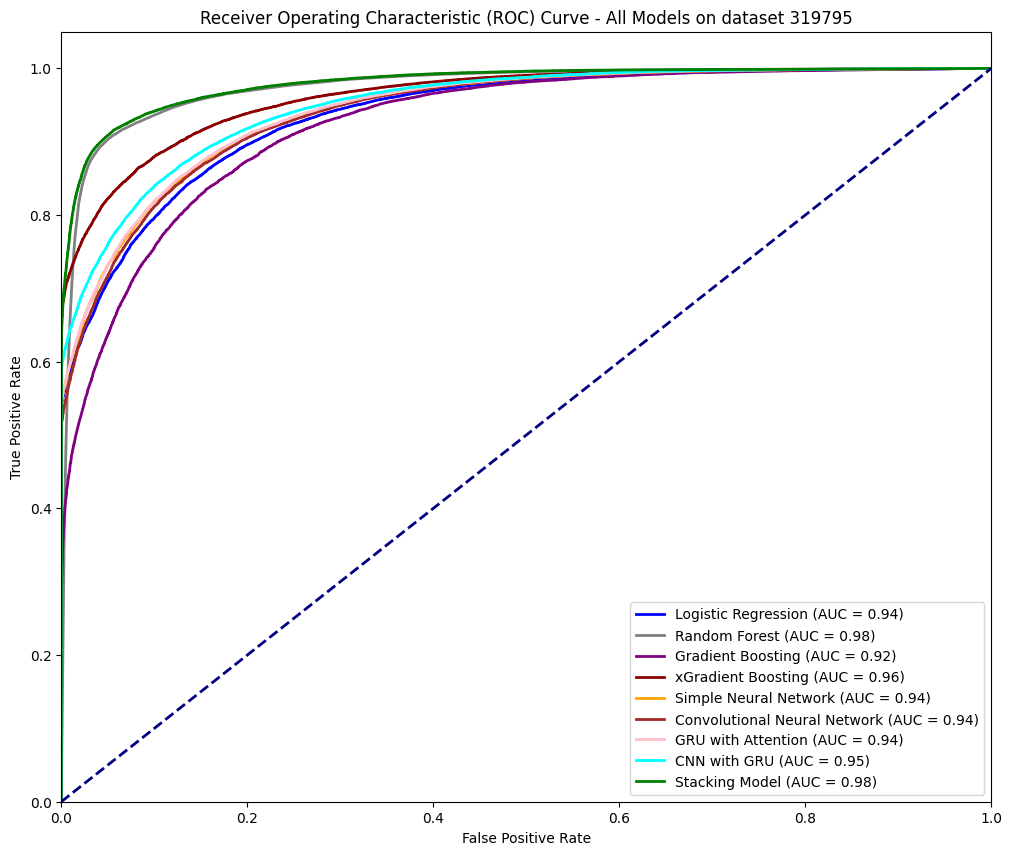

In [ ]:
# ALL ROC Curve in one place

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC for each updated model
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)

#fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
#roc_auc_svm = roc_auc_score(y_test, y_proba_svm)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

fpr_gbm, tpr_gbm, _ = roc_curve(y_test, y_proba_gbm)
roc_auc_gbm = roc_auc_score(y_test, y_proba_gbm)

fpr_xgbm, tpr_xgbm, _ = roc_curve(y_test, y_proba_xgbm)
roc_auc_xgbm = roc_auc_score(y_test, y_proba_xgbm)

fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_nn)
roc_auc_nn = roc_auc_score(y_test, y_pred_nn)

fpr_cnn, tpr_cnn, _ = roc_curve(y_test, y_proba_cnn)
roc_auc_cnn = roc_auc_score(y_test, y_proba_cnn)

fpr_gru_attention, tpr_gru_attention, _ = roc_curve(y_test, y_proba_gru_attention)
roc_auc_gru_attention = roc_auc_score(y_test, y_proba_gru_attention)

fpr_cnn_gru, tpr_cnn_gru, _ = roc_curve(y_test, y_proba_cnn_gru)
roc_auc_cnn_gru = roc_auc_score(y_test, y_proba_cnn_gru)

fpr, tpr, _ = roc_curve(y_test, y_proba_stack)
roc_auc_stack = roc_auc_score(y_test, y_proba_stack)

# Plot all ROC curves on the same plot
#plt.figure()
fig, ax = plt.subplots(figsize=(12, 10))

plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
#plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='gray', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gbm, tpr_gbm, color='purple', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gbm:.2f})')
plt.plot(fpr_xgbm, tpr_xgbm, color='darkred', lw=2, label=f'xGradient Boosting (AUC = {roc_auc_xgbm:.2f})')
plt.plot(fpr_nn, tpr_nn, color='orange', lw=2, label=f'Simple Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot(fpr_cnn, tpr_cnn, color='brown', lw=2, label=f'Convolutional Neural Network (AUC = {roc_auc_cnn:.2f})')
plt.plot(fpr_gru_attention, tpr_gru_attention, color='pink', lw=2, label=f'GRU with Attention (AUC = {roc_auc_gru_attention:.2f})')
plt.plot(fpr_cnn_gru, tpr_cnn_gru, color='cyan', lw=2, label=f'CNN with GRU (AUC = {roc_auc_cnn_gru:.2f})')
plt.plot(fpr, tpr, color='green', lw=2, label=f'Stacking Model (AUC = {roc_auc_stack:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - All Models on dataset 319795')
plt.legend(loc="lower right")
plt.show()

### transformer on 319795 dataset